<p><font size="6"><b> Case study: air quality data of European monitoring stations (AirBase)</b></font></p><br>
**AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. **

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

AirBase is the European air quality database maintained by the European Environment Agency (EEA). It contains air quality monitoring data and information submitted by participating countries throughout Europe. The air quality database consists of a multi-annual time series of air quality measurement data and statistics for a number of air pollutants.

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=900 height=350></iframe>')

Some of the data files that are available from AirBase were included in the data folder: the hourly **concentrations of nitrogen dioxide (NO2)** for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# Processing a single file

We will start with processing one of the downloaded files (`BETR8010000800100hour.1-1-1990.31-12-2012`). Looking at the data, you will see it does not look like a nice csv file:

In [3]:
with open("data/BETR8010000800100hour.1-1-1990.31-12-2012") as f:
    print(f.readline())

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0



So we will need to do some manual processing.

Just reading the tab-delimited data:

In [4]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')#, header=None)

In [5]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


The above data is clearly not ready to be used! Each row contains the 24 measurements for each hour of the day, and also contains a flag (0/1) indicating the quality of the data. Furthermore, there is no header row with column names.

<div class="alert alert-success">

<b>EXERCISE</b>: <br><br> Clean up this dataframe by using more options of `read_csv` (see its [docstring](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html))

 <ul>
  <li>specify the correct delimiter</li>
  <li>specify that the values of -999 and -9999 should be regarded as NaN</li>
  <li>specify are own column names (for how the column names are made up, see See http://stackoverflow.com/questions/6356041/python-intertwining-two-lists)
</ul>
</div>

In [6]:
# Column names: list consisting of 'date' and then intertwined the hour of the day and 'flag'
hours = ["{:02d}".format(i) for i in range(24)]
column_names = ['date'] + [item for pair in zip(hours, ['flag']*24) for item in pair]

In [7]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, names=column_names, na_values=[-999, -9999])

In [8]:
data.head()

,date,00,flag,01,flag.1,02,flag.2,03,flag.3,04,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


For the sake of this tutorial, we will disregard the 'flag' columns (indicating the quality of the data). 

<div class="alert alert-success">

<b>EXERCISE</b>:
<br><br>
Drop all 'flag' columns ('flag1', 'flag2', ...) 

In [9]:
flag_columns = [col for col in data.columns if 'flag' in col]
# we can now use this list to drop these columns

In [10]:
data = data.drop(flag_columns, axis=1)

In [11]:
data.head()

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
4,1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index. Here we have a wide and long dataframe, and want to make this a long, narrow timeseries.

<div class="alert alert-info">

<b>REMEMBER</b>: 

 <ul>
  <li>Recap: reshaping your data with [`stack` and `unstack`](./pandas_07_reshaping_data.ipynb)</li>
</ul>


<img src="img/schema-stack.svg" width=70%>

</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

<br><br>

Reshape the dataframe to a timeseries. 
The end result should look like:<br><br>


<div class='center'>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>BETR801</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-01-02 09:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 12:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 13:00:00</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>1990-01-02 14:00:00</th>
      <td>55.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>2012-12-31 20:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 21:00:00</th>
      <td>14.5</td>
    </tr>
    <tr>
      <th>2012-12-31 22:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 23:00:00</th>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
<p style="text-align:center">170794 rows × 1 columns</p>
</div>

 <ul>
  <li>Reshape the dataframe so that each row consists of one observation for one date + hour combination</li>
  <li>When you have the date and hour values as two columns, combine these columns into a datetime (tip: string columns can be summed to concatenate the strings) and remove the original columns</li>
  <li>Set the new datetime values as the index, and remove the original columns with date and hour values</li>

</ul>


**NOTE**: This is an advanced exercise. Do not spend too much time on it and don't hesitate to look at the solutions. 

</div>



In [12]:
# we use stack to reshape the data to move the hours (the column labels) into a column.
# But we don't want to move the 'date' column label, therefore we first set this as the index.
# You can check the difference with "data.stack()"
data2 = data.set_index('date')
data_stacked = data2.stack()
data_stacked.head()

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [13]:
# We reset the index to have the date and hours available as columns
data_stacked = data_stacked.reset_index()
data_stacked.head()

,date,level_1,0
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [14]:
# Now we combine the dates and the hours into a datetime, and set this as the index
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")

In [15]:
# Drop the origal date and hour columns
data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)
data_stacked.head()

,0
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


In [16]:
# rename the remaining column to the name of the measurement station
data_stacked = data_stacked.rename(columns={0: 'BETR801'})

In [17]:
data_stacked.head()

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


Our final data is now a time series. In pandas, this means that the index is a `DatetimeIndex`:

In [18]:
data_stacked.index

DatetimeIndex(['1990-01-02 09:00:00', '1990-01-02 12:00:00',
               '1990-01-02 13:00:00', '1990-01-02 14:00:00',
               '1990-01-02 15:00:00', '1990-01-02 16:00:00',
               '1990-01-02 17:00:00', '1990-01-02 18:00:00',
               '1990-01-02 19:00:00', '1990-01-02 20:00:00',
               ...
               '2012-12-31 12:00:00', '2012-12-31 13:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=170794, freq=None)

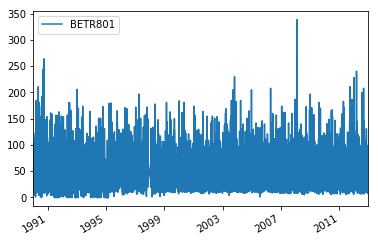

In [19]:
data_stacked.plot()

# Processing a collection of files

We now have seen the code steps to process one of the files. We have however multiple files for the different stations with the same structure. Therefore, to not have to repeat the actual code, let's make a function from the steps we have seen above.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Write a function `read_airbase_file(filename, station)`, using the above steps the read in and process the data, and that returns a processed timeseries.</li>
</ul>
</div>

In [20]:
def read_airbase_file(filename, station):
    """
    Read hourly AirBase data files.
    
    Parameters
    ----------
    filename : string
        Path to the data file.
    station : string
        Name of the station.
       
    Returns
    -------
    DataFrame
        Processed dataframe.
    """
    
    ...
    
    return ...

In [21]:
def read_airbase_file(filename, station):
    """
    Read hourly AirBase data files.
    
    Parameters
    ----------
    filename : string
        Path to the data file.
    station : string
        Name of the station.
       
    Returns
    -------
    DataFrame
        Processed dataframe.
    """
    
    # construct the column names    
    hours = ["{:02d}".format(i) for i in range(24)]
    colnames = ['date'] + [item for pair in zip(hours, ['flag']*24) for item in pair]
    
    # read the actual data
    data = pd.read_csv(filename, sep='\t', header=None, na_values=[-999, -9999], names=colnames)
    
    # drop the 'flag' columns
    data = data.drop([col for col in data.columns if 'flag' in col], axis=1)

    # reshape
    data = data.set_index('date')
    data_stacked = data.stack()
    data_stacked = data_stacked.reset_index()
    
    # parse to datetime and remove redundant columns 
    data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")
    data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)
    data_stacked = data_stacked.rename(columns={0: station})
    
    return data_stacked

Test the function on the data file from above:

In [28]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"
station = filename.split("/")[-1][:7]

In [29]:
station

'BETR801'

In [30]:
test = read_airbase_file(filename, station)
test.head()

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


We now want to use this function to read in all the different data files from AirBase, and combine them into one Dataframe. 

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Use the `glob.glob` function to list all 4 AirBase data files that are included in the 'data' directory, and call the result `data_files`.</li>
</ul>
</div>

In [31]:
import glob

In [33]:
data_files = glob.glob("data/*0008001*")
data_files

['data/FR040370000800100hour.1-1-1999.31-12-2012',
 'data/BETR8010000800100hour.1-1-1990.31-12-2012',
 'data/FR040120000800100hour.1-1-1999.31-12-2012',
 'data/BETN0290000800100hour.1-1-1990.31-12-2012']

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Loop over the data files, read and process the file using our defined function, and append the dataframe to a list.</li>
  <li>Combine the the different DataFrames in the list into a single DataFrame where the different columns are the different stations. Call the result `combined_data`.</li>

</ul>
</div>

In [34]:
dfs = []

for filename in data_files:
    station = filename.split("/")[-1][:7]
    df = read_airbase_file(filename, station)
    dfs.append(df)

In [35]:
combined_data = pd.concat(dfs, axis=1)

In [36]:
combined_data.head()

,FR04037,BETR801,FR04012,BETN029
1990-01-01 00:00:00,NaN,NaN,NaN,16.0
1990-01-01 01:00:00,NaN,NaN,NaN,18.0
1990-01-01 02:00:00,NaN,NaN,NaN,21.0
1990-01-01 03:00:00,NaN,NaN,NaN,26.0
1990-01-01 04:00:00,NaN,NaN,NaN,21.0


Finally, we don't want to have to repeat this each time we use the data. Therefore, let's save the processed data to a csv file.

In [30]:
combined_data.to_csv("airbase_data.csv")

# Working with time series data

We processed the individual data files above, and saved it to a csv file `airbase_data.csv`. Let's import the file here (if you didn't finish the above exercises, a version of the dataset is also available in `data/airbase_data.csv`):

In [44]:
alldata = pd.read_csv('airbase_data.csv', index_col=0, parse_dates=True)

We only use the data from 1999 onwards:

In [45]:
data = alldata['1999':].copy()

Som first exploration with the *typical* functions:

In [46]:
data.head() # tail()

,BETR801,BETN029,FR04037,FR04012
1999-01-01 00:00:00,27.0,13.0,68.0,105.0
1999-01-01 01:00:00,33.0,15.0,70.0,116.0
1999-01-01 02:00:00,24.0,16.0,72.0,114.0
1999-01-01 03:00:00,26.0,18.0,72.0,91.0
1999-01-01 04:00:00,NaN,19.0,74.0,81.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122736 entries, 1999-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    106628 non-null float64
BETN029    111989 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 4.7 MB


In [48]:
data.describe(percentiles=[0.1, 0.5, 0.9])

,BETR801,BETN029,FR04037,FR04012
count,106628.000000,111989.00000,120384.000000,119448.000000
mean,46.728969,16.42093,40.040005,87.993261
std,21.708333,12.31968,23.024347,41.317684
min,1.000000,1.00000,0.000000,0.000000
10%,21.000000,4.00000,14.000000,37.000000
50%,45.000000,12.00000,37.000000,88.000000
90%,75.000000,34.00000,70.000000,139.000000
max,339.000000,105.00000,256.000000,358.000000


Quickly visualizing the data

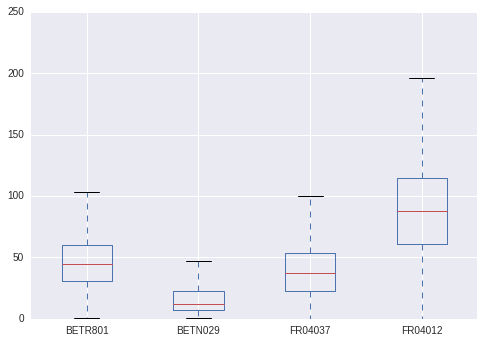

In [9]:
data.plot(kind='box', ylim=[0,250])

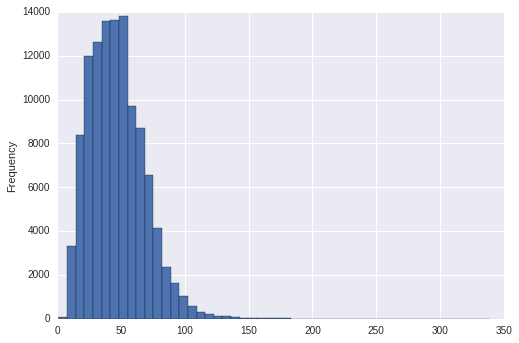

In [10]:
data['BETR801'].plot(kind='hist', bins=50)

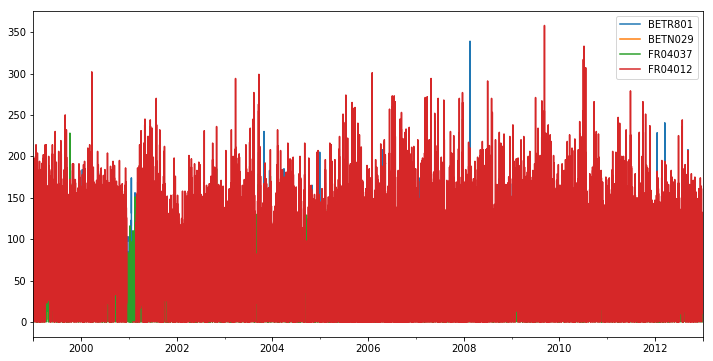

In [49]:
data.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

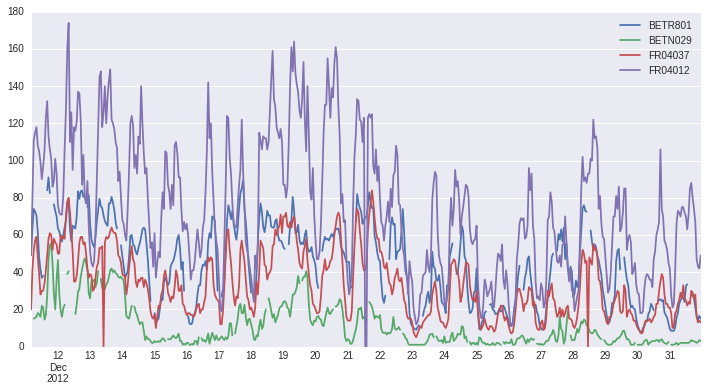

In [12]:
data[-500:].plot(figsize=(12,6))

## Exercises

<div class="alert alert-warning">

<b>REMINDER</b>: <br><br>

Take a look at the [Timeseries notebook](05 - Time series data.ipynb) when you require more info about...

 <ul>
  <li>`resample`</li>
  <li>string indexing of DateTimeIndex</li>
</ul><br><br>

</div>

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mean and median concentration of the 'FR04037' station for the years 2009-2012
</div>

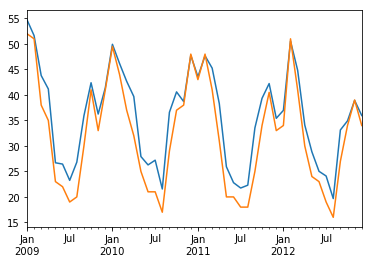

In [50]:
data.loc['2009':, 'FR04037'].resample('M').mean().plot()
data.loc['2009':, 'FR04037'].resample('M').median().plot()

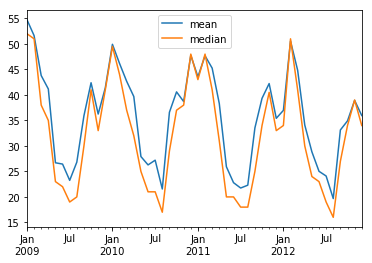

In [51]:
data.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mininum and maximum daily concentration of the 'BETR801' station
</div>

In [52]:
daily = data['FR04037'].resample('D').mean()

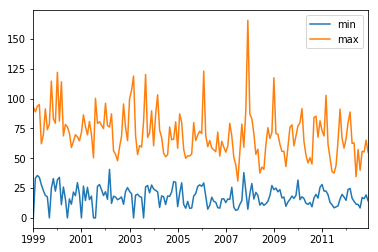

In [53]:
daily.resample('M').agg(['min', 'max']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: make a bar plot of the mean of the stations in year of 2012
</div>

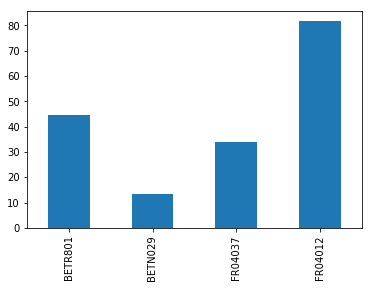

In [54]:
data['2012'].mean().plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: The evolution of the yearly averages with, and the overall mean of all stations (indicate the overall mean with a thicker black line)?
</div>

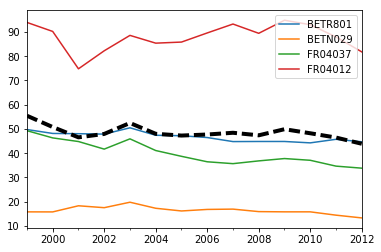

In [55]:
data.resample('A').mean().plot()
data.mean(axis=1).resample('A').mean().plot(color='k', linestyle='--', linewidth=4)

### Combination with groupby

`resample` can actually be seen as a specific kind of `groupby`. E.g. taking annual means with `data.resample('A', 'mean')` is equivalent to `data.groupby(data.index.year).mean()` (only the result of `resample` still has a DatetimeIndex).



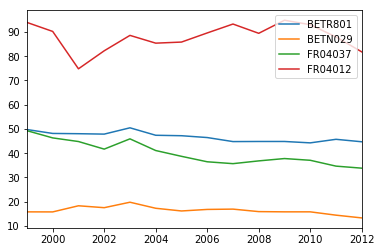

In [56]:
data.groupby(data.index.year).mean().plot()

But, `groupby` is more flexible and can also do resamples that do not result in a new continuous time series, e.g. by grouping by the hour of the day to get the diurnal cycle.

<div class="alert alert-success">
    <b>QUESTION</b>: how does the *typical monthly profile* look like for the different stations?
</div>

1\. add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [57]:
data['month'] = data.index.month

2\. Now, we can calculate the mean of each month over the different years:

In [58]:
data.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,51.955189,19.832429,47.634409,82.472813
2,53.721187,20.238004,50.564499,83.973207
3,53.737157,19.741470,47.862715,96.272138
4,49.445248,17.865095,40.943117,95.962862
...,...,...,...,...
9,47.193898,14.292315,39.706019,93.000316
10,48.649218,17.007418,44.010934,86.297836
11,50.186465,17.900151,45.564683,87.173878
12,50.194588,20.200031,45.262243,81.817977


3\. plot the typical monthly profile of the different stations:

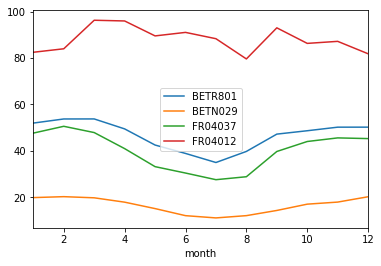

In [59]:
data.groupby('month').mean().plot()

In [62]:
data = data.drop('month', axis=1, errors='ignore')

<div class="alert alert-success">
    <b>QUESTION</b>: plot the weekly 95% percentiles of the concentration in 'BETR801' and 'BETN029' for 2011
</div>

In [63]:
df2011 = data['2011'].dropna()

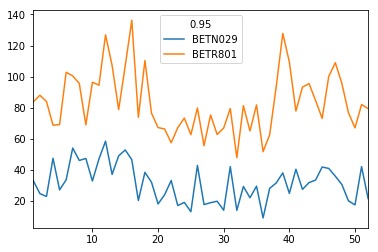

In [64]:
df2011 = data['2011'].dropna()
df2011.groupby(df2011.index.week)[['BETN029', 'BETR801']].quantile(0.95).plot()

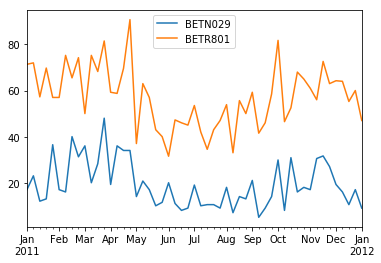

In [65]:
df2011[['BETN029', 'BETR801']].resample('W').agg(lambda x: x.quantile(0.75)).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: The typical diurnal profile for the different stations?
</div>

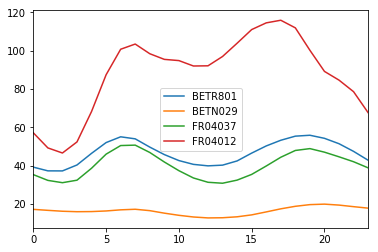

In [66]:
data.groupby(data.index.hour).mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 for each year/station?
</div>

In [67]:
exceedances = data > 200

In [68]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

In [69]:
exceedances

,BETR801,BETN029,FR04037,FR04012
1999,0.0,0.0,3.0,39.0
2000,0.0,0.0,0.0,17.0
2001,0.0,0.0,0.0,88.0
2002,0.0,0.0,0.0,12.0
...,...,...,...,...
2009,0.0,0.0,0.0,58.0
2010,0.0,0.0,0.0,104.0
2011,1.0,0.0,0.0,62.0
2012,6.0,0.0,0.0,13.0


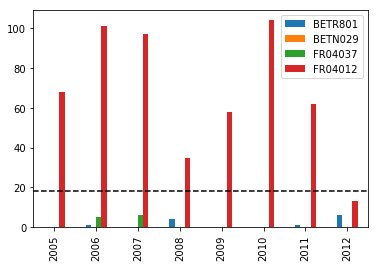

In [70]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

<div class="alert alert-success">
    <b>QUESTION</b>: And are there exceedances of the yearly limit value of 40 µg/m3 since 200 ?
</div>

In [72]:
yearly = data['2000':].resample('A').mean()

In [73]:
(yearly > 40).sum()

BETR801    13
BETN029     0
FR04037     5
FR04012    13
dtype: int64

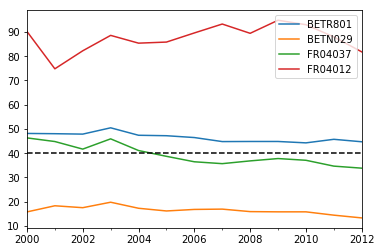

In [74]:
yearly.plot()
plt.axhline(40, linestyle='--', color='k')

<div class="alert alert-success">
    <b>QUESTION</b>: What is the difference in the typical diurnal profile between week and weekend days? (and visualise it)
</div>

In [75]:
data.index.weekday?

In [76]:
data['weekday'] = data.index.weekday

Add a column indicating week/weekend

In [77]:
data['weekend'] = data['weekday'].isin([5, 6])

In [78]:
data_weekend = data.groupby(['weekend', data.index.hour]).mean()
data_weekend.head()

BETR801    BETN029    FR04037    FR04012  weekday
weekend                                                       
False   0  38.693423  17.415094  34.439398  52.094663      2.0
        1  37.128589  16.985991  31.585121  44.721629      2.0
        2  37.837973  16.530217  30.865143  43.518539      2.0
        3  42.446300  16.362120  32.963500  51.942135      2.0
        4  50.478893  16.696870  40.780162  72.547472      2.0

In [79]:
data_weekend_BETR801 = data_weekend['BETR801'].unstack(level=0)
data_weekend_BETR801.head()

weekend,False,True
0,38.693423,40.634184
1,37.128589,37.774169
2,37.837973,35.909899
3,42.446300,35.236208
4,50.478893,36.435609


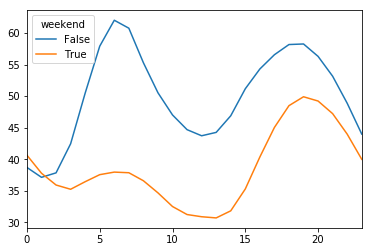

In [80]:
data_weekend_BETR801.plot()

In [81]:
data = data.drop(['weekday', 'weekend'], axis=1)

<div class="alert alert-success">
    <b>QUESTION</b>: Visualize the typical week profile for the different stations as boxplots (where the values in one boxplot are the daily means for the different weeks for a certain weekday).
</div>

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns). For this, you can either use `pivot_table` as a combination of `groupby` and `unstack`

In [82]:
# add a weekday and week column
data['weekday'] = data.index.weekday
data['week'] = data.index.week
data.head()

,BETR801,BETN029,FR04037,FR04012,weekday,week
1999-01-01 00:00:00,27.0,13.0,68.0,105.0,4,53
1999-01-01 01:00:00,33.0,15.0,70.0,116.0,4,53
1999-01-01 02:00:00,24.0,16.0,72.0,114.0,4,53
1999-01-01 03:00:00,26.0,18.0,72.0,91.0,4,53
1999-01-01 04:00:00,NaN,19.0,74.0,81.0,4,53


In [83]:
# pivot table so that the weekdays are the different columns
data_pivoted = data['2012'].pivot_table(columns='weekday', index='week', values='BETR801')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,28.545455,25.727273,30.260870,22.704545,44.473684,27.113636,39.590909
2,55.227273,60.113636,50.250000,42.550000,58.704545,68.181818,68.568182
3,73.704545,113.863636,61.045455,43.636364,43.363636,28.826087,22.340909
4,46.944444,71.659091,57.565217,59.833333,65.818182,50.181818,29.500000
5,47.775000,53.750000,41.318182,44.227273,72.250000,76.409091,68.500000


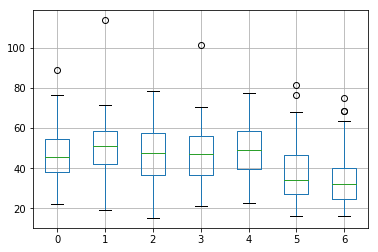

In [84]:
box = data_pivoted.boxplot()

An alternative method using `groupby` and `unstack`:

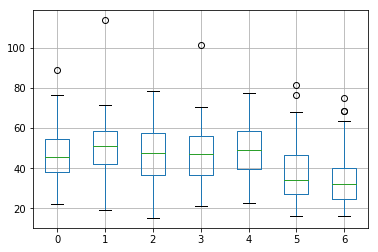

In [85]:
data['2012'].groupby(['weekday', 'week'])['BETR801'].mean().unstack(level=0).boxplot();

<div class="alert alert-success">
    <b>QUESTION</b>: The maximum daily 8 hour mean should be below 100 µg/m³. What are the number of exceedances of this limit for each year/station?
</div>

Tip: have a look at the `rolling` method to perform moving window operations.

Note: this is not an actual limit for NO2, but a nice exercise to introduce the `rolling` method. Other pollutans, such as 03 have actually such kind of limit values.

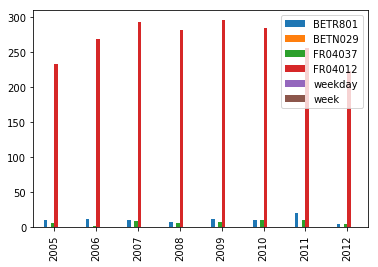

In [86]:
exceedances = data.rolling(8).mean().resample('D').max() > 100
exceedances = exceedances.groupby(exceedances.index.year).sum()
ax = exceedances.loc[2005:].plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: Calculate the correlation between the different stations
</div>


In [87]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.472954,0.561676,0.394446
BETN029,0.472954,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


In [88]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].resample('D').mean().corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.604825,0.663855,0.459885
BETN029,0.604825,1.000000,0.527390,0.312484
FR04037,0.663855,0.527390,1.000000,0.453584
FR04012,0.459885,0.312484,0.453584,1.000000
